In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [8]:
cereal_df = pd.read_csv(r'./cereal.csv')


In [9]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [10]:
fields = ['shelf','weight','cups','rating']
cereal_df_new = cereal_df.drop(fields, axis=1)

In [11]:
cereal_df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25


In [12]:
# Get correlation data
cereal_corr = cereal_df_new.corr()
cereal_corr.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243


Trực quan khóa dữ liệu (heat map)

In [13]:
ones_corr = np.ones_like(cereal_corr, dtype= bool)
print(ones_corr)

[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]]


In [14]:
mask = np.triu(ones_corr)
print(mask)

[[ True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True]
 [False False False False False  True  True  True  True]
 [False False False False False False  True  True  True]
 [False False False False False False False  True  True]
 [False False False False False False False False  True]]


AxesSubplot(0.125,0.125;0.62x0.755)


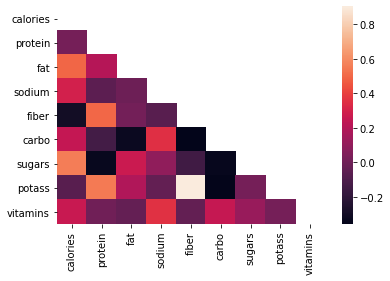

In [15]:
h_map = sns.heatmap(data= cereal_corr, mask= mask)
print(h_map)

In [16]:
# Tạo mask bỏ dòng 0 và cột cuối.
modify_mask = mask[1:,:-1]
print(modify_mask)

[[False  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True]
 [False False False  True  True  True  True  True]
 [False False False False  True  True  True  True]
 [False False False False False  True  True  True]
 [False False False False False False  True  True]
 [False False False False False False False  True]
 [False False False False False False False False]]


In [17]:
# Tạo matrix corr bỏ dòng 0 và cột cuối.
modify_cereal_corr = cereal_corr.iloc[1:,:-1]

data= 
mask= 
annot= True : Hiển thị các số trong các ô màu
annot_kws = {'fontsize': 13} : Thiết lập cở chữ cho các số trong các ô màu
fmt= ".2f" : Thiết lập format của số trong các ô màu là số thập phân có 2 chữ số
cmap= 'Blues': Thiết lập màu biểu đồ
cmap= sns.diverging_palette(0,230,90,60, as_cmap=True): Dùng gói màu biểu đồ
vmin = -1, vmax= 1 : Giới hạn min, max của cột heatmap
linecolor= 'white', linewidths= 0.5: tạo các đường cắt giữa các ô màu

Text(0.5, 1.0, 'SAMPLE OF SEABORN')

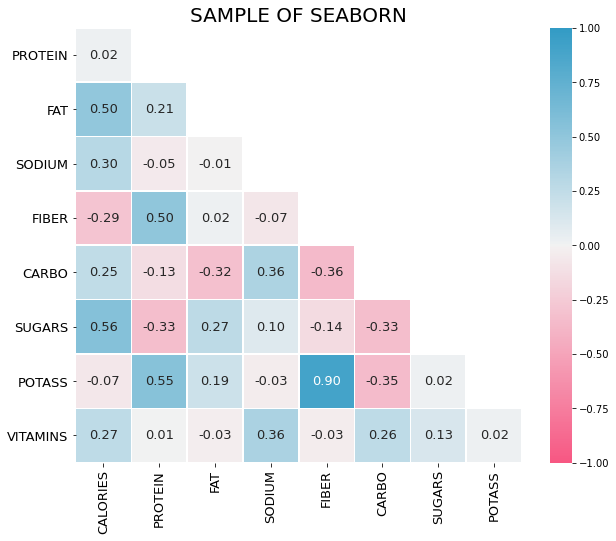

In [18]:
fig, ax = plt.subplots(figsize= (10,8))

cmap= sns.diverging_palette(0,230,90,60, as_cmap=True)

h_map_modify = sns.heatmap(data=modify_cereal_corr,
                            mask= modify_mask,
                            annot=True,
                            annot_kws= {'fontsize': 13},
                            fmt= ".2f",
                            cmap= cmap,
                            vmin = -1, vmax= 1, 
                            linecolor= 'white', linewidths= 0.5)
# Tạo list chứa các từ IN HOA 
y_ticks = [i.upper() for i in modify_cereal_corr.index]
x_ticks = [i.upper() for i in modify_cereal_corr.columns]

# Thiết lập ylable và xlable
ax.set_yticklabels(y_ticks, rotation=0, fontsize= 13)
ax.set_xticklabels(x_ticks, rotation= 90, fontsize= 13)

# Thiết lập title
ax.set_title('SAMPLE OF SEABORN',loc='center',fontsize= 20)